In [3]:
import os
import csv
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter

In [4]:
# helper functions

def series_append(series, list, keys):
    for i in range(64):
        series[keys[i]].append(float(list[i]))
    return series

def load_series(filename):
    with open(filename, 'r') as csv_in:
        csv_file = list(csv.reader(csv_in))
        series = {}
        # print(len(csv_file))
        keys = csv_file[0]
        for key in keys: series[key] = []
        for i in range(2, len(csv_file), 2):
            # print(len(csv_file[i]))
            series = series_append(series, csv_file[i], keys)
        return [series, int((len(csv_file) - 2) / 2)]

def xyz_centroids(series, i):
    x_sum = 0.0
    y_sum = 0.0
    z_sum = 0.0
    for key in series:
        if (key[-1] == 'x'):
            x_sum += series[key][i]
        elif (key[-1] == 'y'):
            y_sum += series[key][i]
        elif (key[-1] == 'z'):
            z_sum += series[key][i]
    x_sum /= 16.0
    y_sum /= 16.0
    z_sum /= 16.0
    return [x_sum, y_sum, z_sum]

def moving_average(input_list, step_size):
    final_list = []
    for i in range(int((step_size - 1) / 2)):
        final_list.append(None)
    interval_start = 0
    interval_end = int(step_size - 1)
    while (interval_end < len(input_list)):
        final_list.append(int(float(sum(input_list[interval_start : interval_end + 1])) / float(step_size)))
        interval_start += 1
        interval_end += 1
    for i in range(int((step_size - 1) / 2)):
        final_list.append(None)
    return final_list
    


In [49]:
sr_filepath = '..\\time_series\\supplement\\'
sr_files = os.listdir(sr_filepath)

ws_filepath = '..\\time_series\\web_scrape\\'
ws_files = os.listdir(ws_filepath)

# print(sr_files)

x_list = []
y_list = []

orig_x_list = []
orig_y_list = []

centroid_list_x = []
centroid_list_y = []

for ws_csv in ws_files:
    if ('0123' not in ws_csv):
        continue
    filename = ws_filepath + ws_csv
    series, num_frames = load_series(filename)
    # print(num_frames)
    # print(series)

    for key in series:
        if (key[-1] == 'x'):
            orig_x_list.append(series[key][4])
        elif (key[-1] == 'y'):
            orig_y_list.append(series[key][4])

    for frame in range(num_frames):
        x_cent, y_cent, z_cent = xyz_centroids(series, frame)
        centroid_list_x.append(x_cent)
        centroid_list_y.append(y_cent)
        for key in series:
            # x_list.append
            if (key[-1] == 'x'):
                series[key][frame] -= x_cent
            elif (key[-1] == 'y'):
                series[key][frame] -= y_cent
            elif (key[-1] == 'z'):
                series[key][frame] -= z_cent

    break


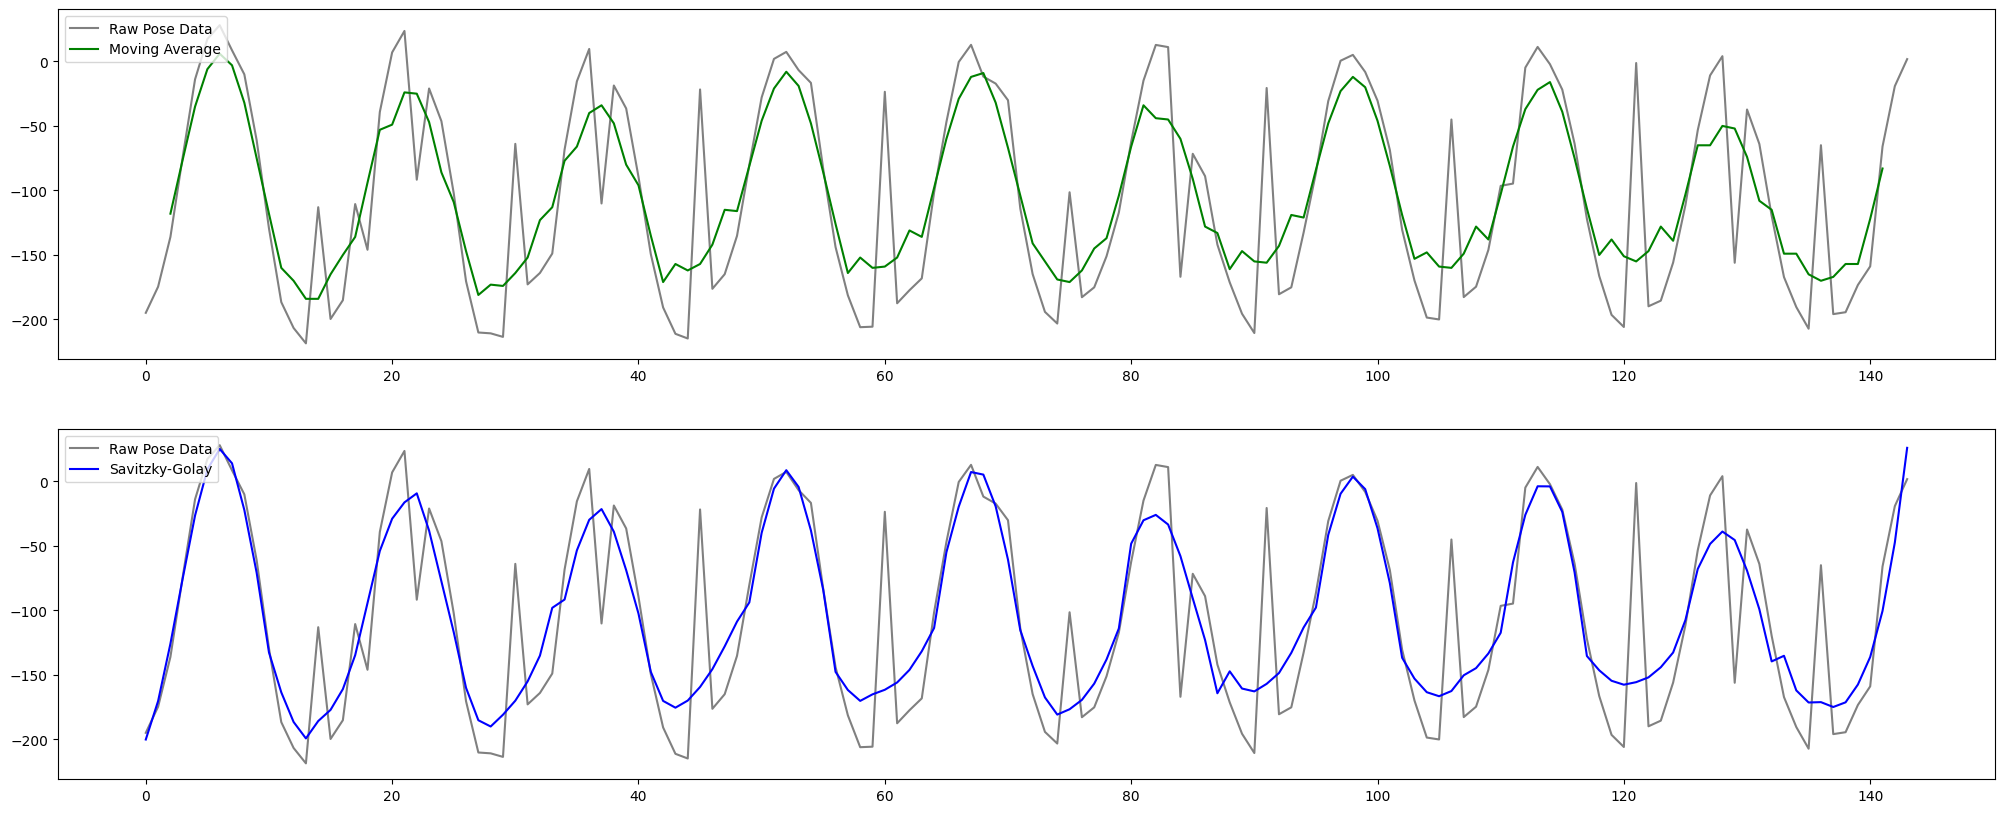

In [50]:

# visualization

fig, (ax1, ax2) = plt.subplots(2, figsize=(25, 10))
# plt.scatter(np.arange(0, num_frames), centroid_list_y)
ax1.plot(np.arange(0, num_frames), series['left_heel_y'], color='gray', label='Raw Pose Data')
ax2.plot(np.arange(0, num_frames), series['left_heel_y'], color='gray', label='Raw Pose Data')
ax1.plot(np.arange(0, num_frames), moving_average(series['left_heel_y'], 5), color='green', label='Moving Average')
ax1.legend(loc='upper left')
ax2.plot(np.arange(0, num_frames), savgol_filter(series['left_heel_y'], window_length=9, polyorder=3), color='blue', label='Savitzky-Golay')
ax2.legend(loc='upper left')
plt.show()

[ 233.12653142  127.07714766  439.40844168  173.16611945  249.00799223
  581.34131019  231.138814    169.03385049 5692.30966983  271.85903973
  266.92354317  450.5994678   406.28488121  115.66664196  439.77703877
   58.13794124  136.98022744 1231.50419833  206.150585    269.28968708
  171.067665     99.41945706   66.24466708  108.54897158   37.7089434
   10.74348936   34.68527667   43.157852     77.6236585    85.83997621
  105.7068534    52.67657695   71.79073375   20.94382077   89.68094379
  153.77716849  155.05986655   56.31212922  157.85481297  104.65315041
   65.06285246   61.53622679   35.19387703   40.8812243    77.93220707
   37.94221111   49.12162069   58.13446364   13.40043361   81.48399196
   13.40147141   96.43104151   54.79383261   99.48347871  143.62837802
   66.48700067   79.78870347   59.51573905   36.9592513    23.27468824
   22.62518529   22.76881157   64.7951821    49.95778319  124.9161625
   61.51111572   55.29527868   75.58495774   30.95464065   75.58495774
   55.29

c:\Users\adars\AppData\Local\Programs\Python\Python39\lib\site-packages\matplotlib\cbook\__init__.py:1289: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


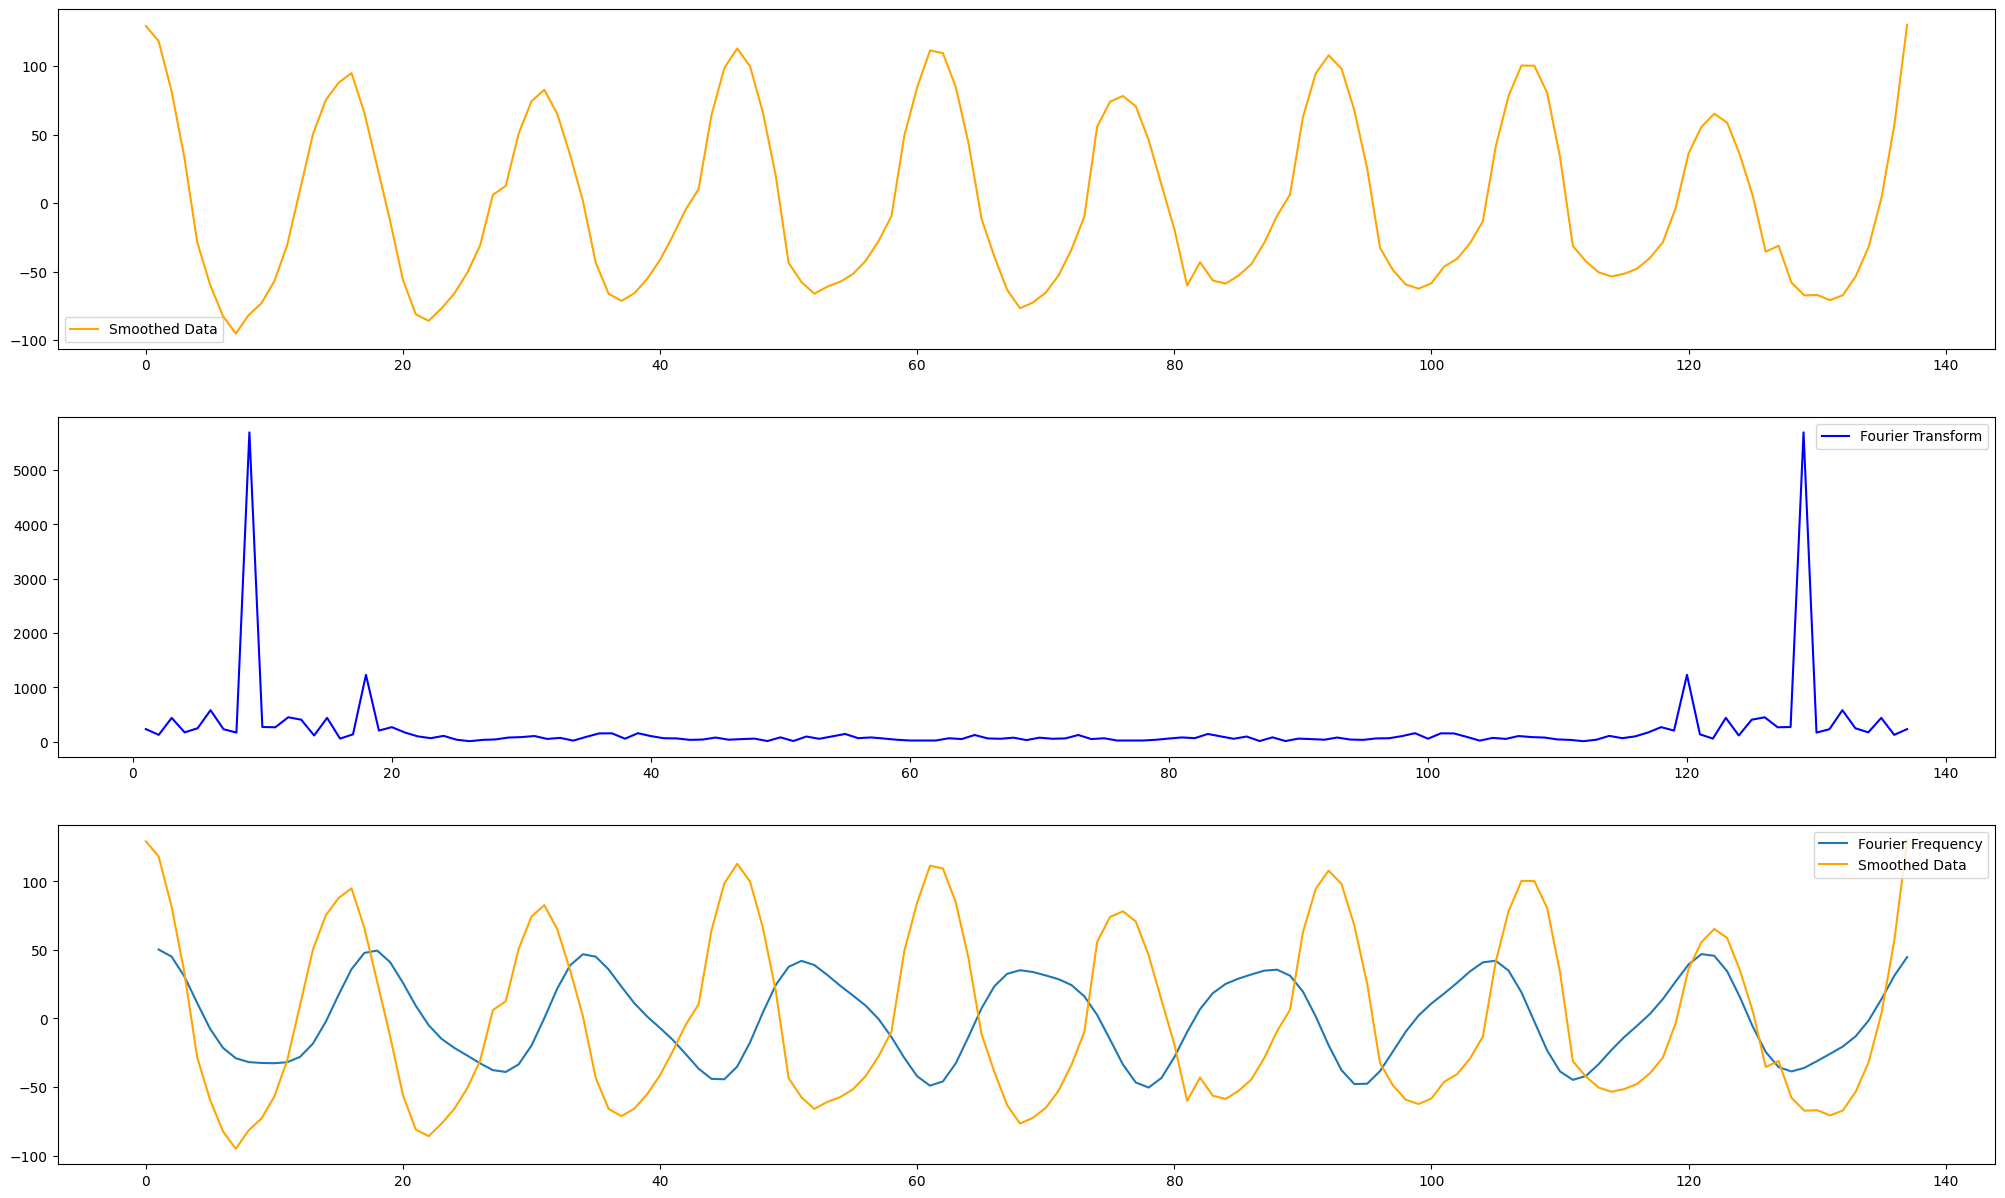

In [75]:

l = series['left_heel_y']
l = savgol_filter(l, window_length=9, polyorder=3)
l = np.array(l)
l -= l.mean()
# print(l)
l = l[6:]

fig, (ax1, ax2, ax3) = plt.subplots(3, figsize=(25, 15), sharex=False, sharey=False)
ax1.plot(np.arange(0, len(l)), l, color='orange', label='Smoothed Data')

t = np.arange(0, len(l))[1:]

fourier_transform = np.fft.fft(l)

fourier_transform = fourier_transform[1:]

ax2.plot(t, abs(fourier_transform), color='blue', label='Fourier Transform')
ax2.legend(), ax1.legend()
print(abs(fourier_transform))

imax=np.argmax(np.absolute(fourier_transform))
print('VALUE AT IMAX: ' + str(fourier_transform[imax]))
mask=np.zeros_like(fourier_transform)
mask[imax]=1
mask[17] = 1
fourier_transform *= mask
fdata=np.fft.ifft(fourier_transform)
print(np.arctan2(fourier_transform[imax].imag, fourier_transform[imax].real))


ax3.plot(t, fdata, label='Fourier Frequency')
ax3.plot(np.arange(0,len(l)), l, color='orange', label='Smoothed Data')
ax3.legend(loc='upper right')

plt.show()

# print(x_list)
# print(y_list)


# print(series)